In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
supervised_learning_df = pd.read_csv(r"C:\Users\DAMILOLA\Desktop\Python\Aircraft Engine Maintenance Prediciton\aircraft_maintenance_dataset - aircraft_maintenance_dataset.csv")

In [3]:
supervised_learning_df.head()

Unnamed: 0  Engine_ID            Timestamp  Temperature    Pressure  \
0           0          1   2021-01-01 0:00:00   422.054903  100.807939   
1           1          1  2021-01-01 12:30:00   507.136118  129.716804   
2           2          1   2021-01-02 1:00:00   479.792480  116.290144   
3           3          1  2021-01-02 13:30:00   492.833403  133.670171   
4           4          1   2021-01-03 2:00:00   512.091838  128.039988   

   Rotational_Speed  Engine_Health  Fuel_Consumption  Vibration_Level  \
0               NaN       1.429142         32.022897         2.005211   
1       3208.155401       1.519785         28.767758         1.964717   
2       2955.616059       1.735809         26.539397         2.041816   
3               NaN       1.369706         22.998673         1.322682   
4       2895.081244       1.347507         37.395280         1.675624   

   Oil_Temperature     Altitude   Humidity  Maintenance_Needed  Engine_Failure  
0        69.120540   697.620089  48.489727                   0               0  
1        85.343125  1043.885117  56.389126                   0               0  
2        84.476892  1328.160839  35.502047                   0               0  
3        92.394769  1033.610159  78.287849                   0               0  
4        70.746788  1114.664212  51.155288                   0               0

In [4]:
supervised_learning_df.describe().T

count         mean          std          min  \
Unnamed: 0          10505.0  5252.000000  3032.676623     0.000000   
Engine_ID           10505.0     3.000000     1.414281     1.000000   
Temperature          9958.0   499.735275    49.943309   324.730327   
Pressure             9978.0   119.620927    14.202546    71.209680   
Rotational_Speed     9980.0  2996.029362   198.734422  2224.828129   
Engine_Health        9452.0     1.396657     0.247244     0.364363   
Fuel_Consumption    10505.0    29.952700     4.954137     7.864834   
Vibration_Level     10505.0     1.997909     0.497782     0.137410   
Oil_Temperature     10505.0    79.891094     9.858740    35.416729   
Altitude            10505.0   999.006854   199.777520   303.856187   
Humidity            10505.0    49.925653     9.887254    14.017215   
Maintenance_Needed  10505.0     0.197144     0.397861     0.000000   
Engine_Failure      10505.0     0.068348     0.252355     0.000000   

                            25%          50%          75%           max  
Unnamed: 0          2626.000000  5252.000000  7878.000000  10504.000000  
Engine_ID              2.000000     3.000000     4.000000      5.000000  
Temperature          466.600926   500.300525   533.377208    688.651782  
Pressure             109.959969   119.563929   129.221903    169.665660  
Rotational_Speed    2864.200250  2995.461865  3128.946233   3799.657567  
Engine_Health          1.223561     1.393697     1.565045      2.215769  
Fuel_Consumption      26.539397    29.980604    33.319967     47.537040  
Vibration_Level        1.662721     1.996974     2.332652      3.956912  
Oil_Temperature       73.201200    79.888624    86.452604    117.843212  
Altitude             864.085489   997.203075  1134.843433   1871.074017  
Humidity              43.216698    50.063695    56.648708     87.122723  
Maintenance_Needed     0.000000     0.000000     0.000000      1.000000  
Engine_Failure         0.000000     0.000000     0.000000      1.000000

##### Distribution of the Target Variable:

The count plot shows the distribution of the binary target variable 'Engine_Failure,' indicating the proportion of instances where maintenance is needed or not.

In [5]:
# Set the plotting style
sns.set(style='whitegrid')

<Axes: xlabel='Engine_Failure', ylabel='count'>

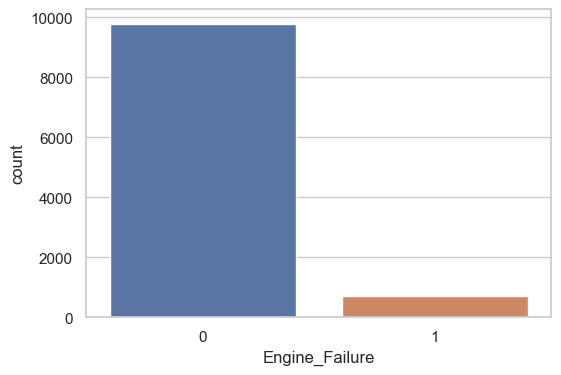

In [6]:
# Distribution of the target variable 'Maintenance_Needed'
plt.figure(figsize=(6,4))
sns.countplot(x='Engine_Failure', data=supervised_learning_df)

#### Pairplot of Selected Features:

The pairplot displays scatterplots of selected features against each other, with different colors for instances where the Engine Failed or did not. This helps observe potential separability of classes based on feature values.

In [7]:
supervised_learning_df.head(1)

Unnamed: 0  Engine_ID           Timestamp  Temperature    Pressure  \
0           0          1  2021-01-01 0:00:00   422.054903  100.807939   

   Rotational_Speed  Engine_Health  Fuel_Consumption  Vibration_Level  \
0               NaN       1.429142         32.022897         2.005211   

   Oil_Temperature    Altitude   Humidity  Maintenance_Needed  Engine_Failure  
0         69.12054  697.620089  48.489727                   0               0

C:\Users\DAMILOLA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

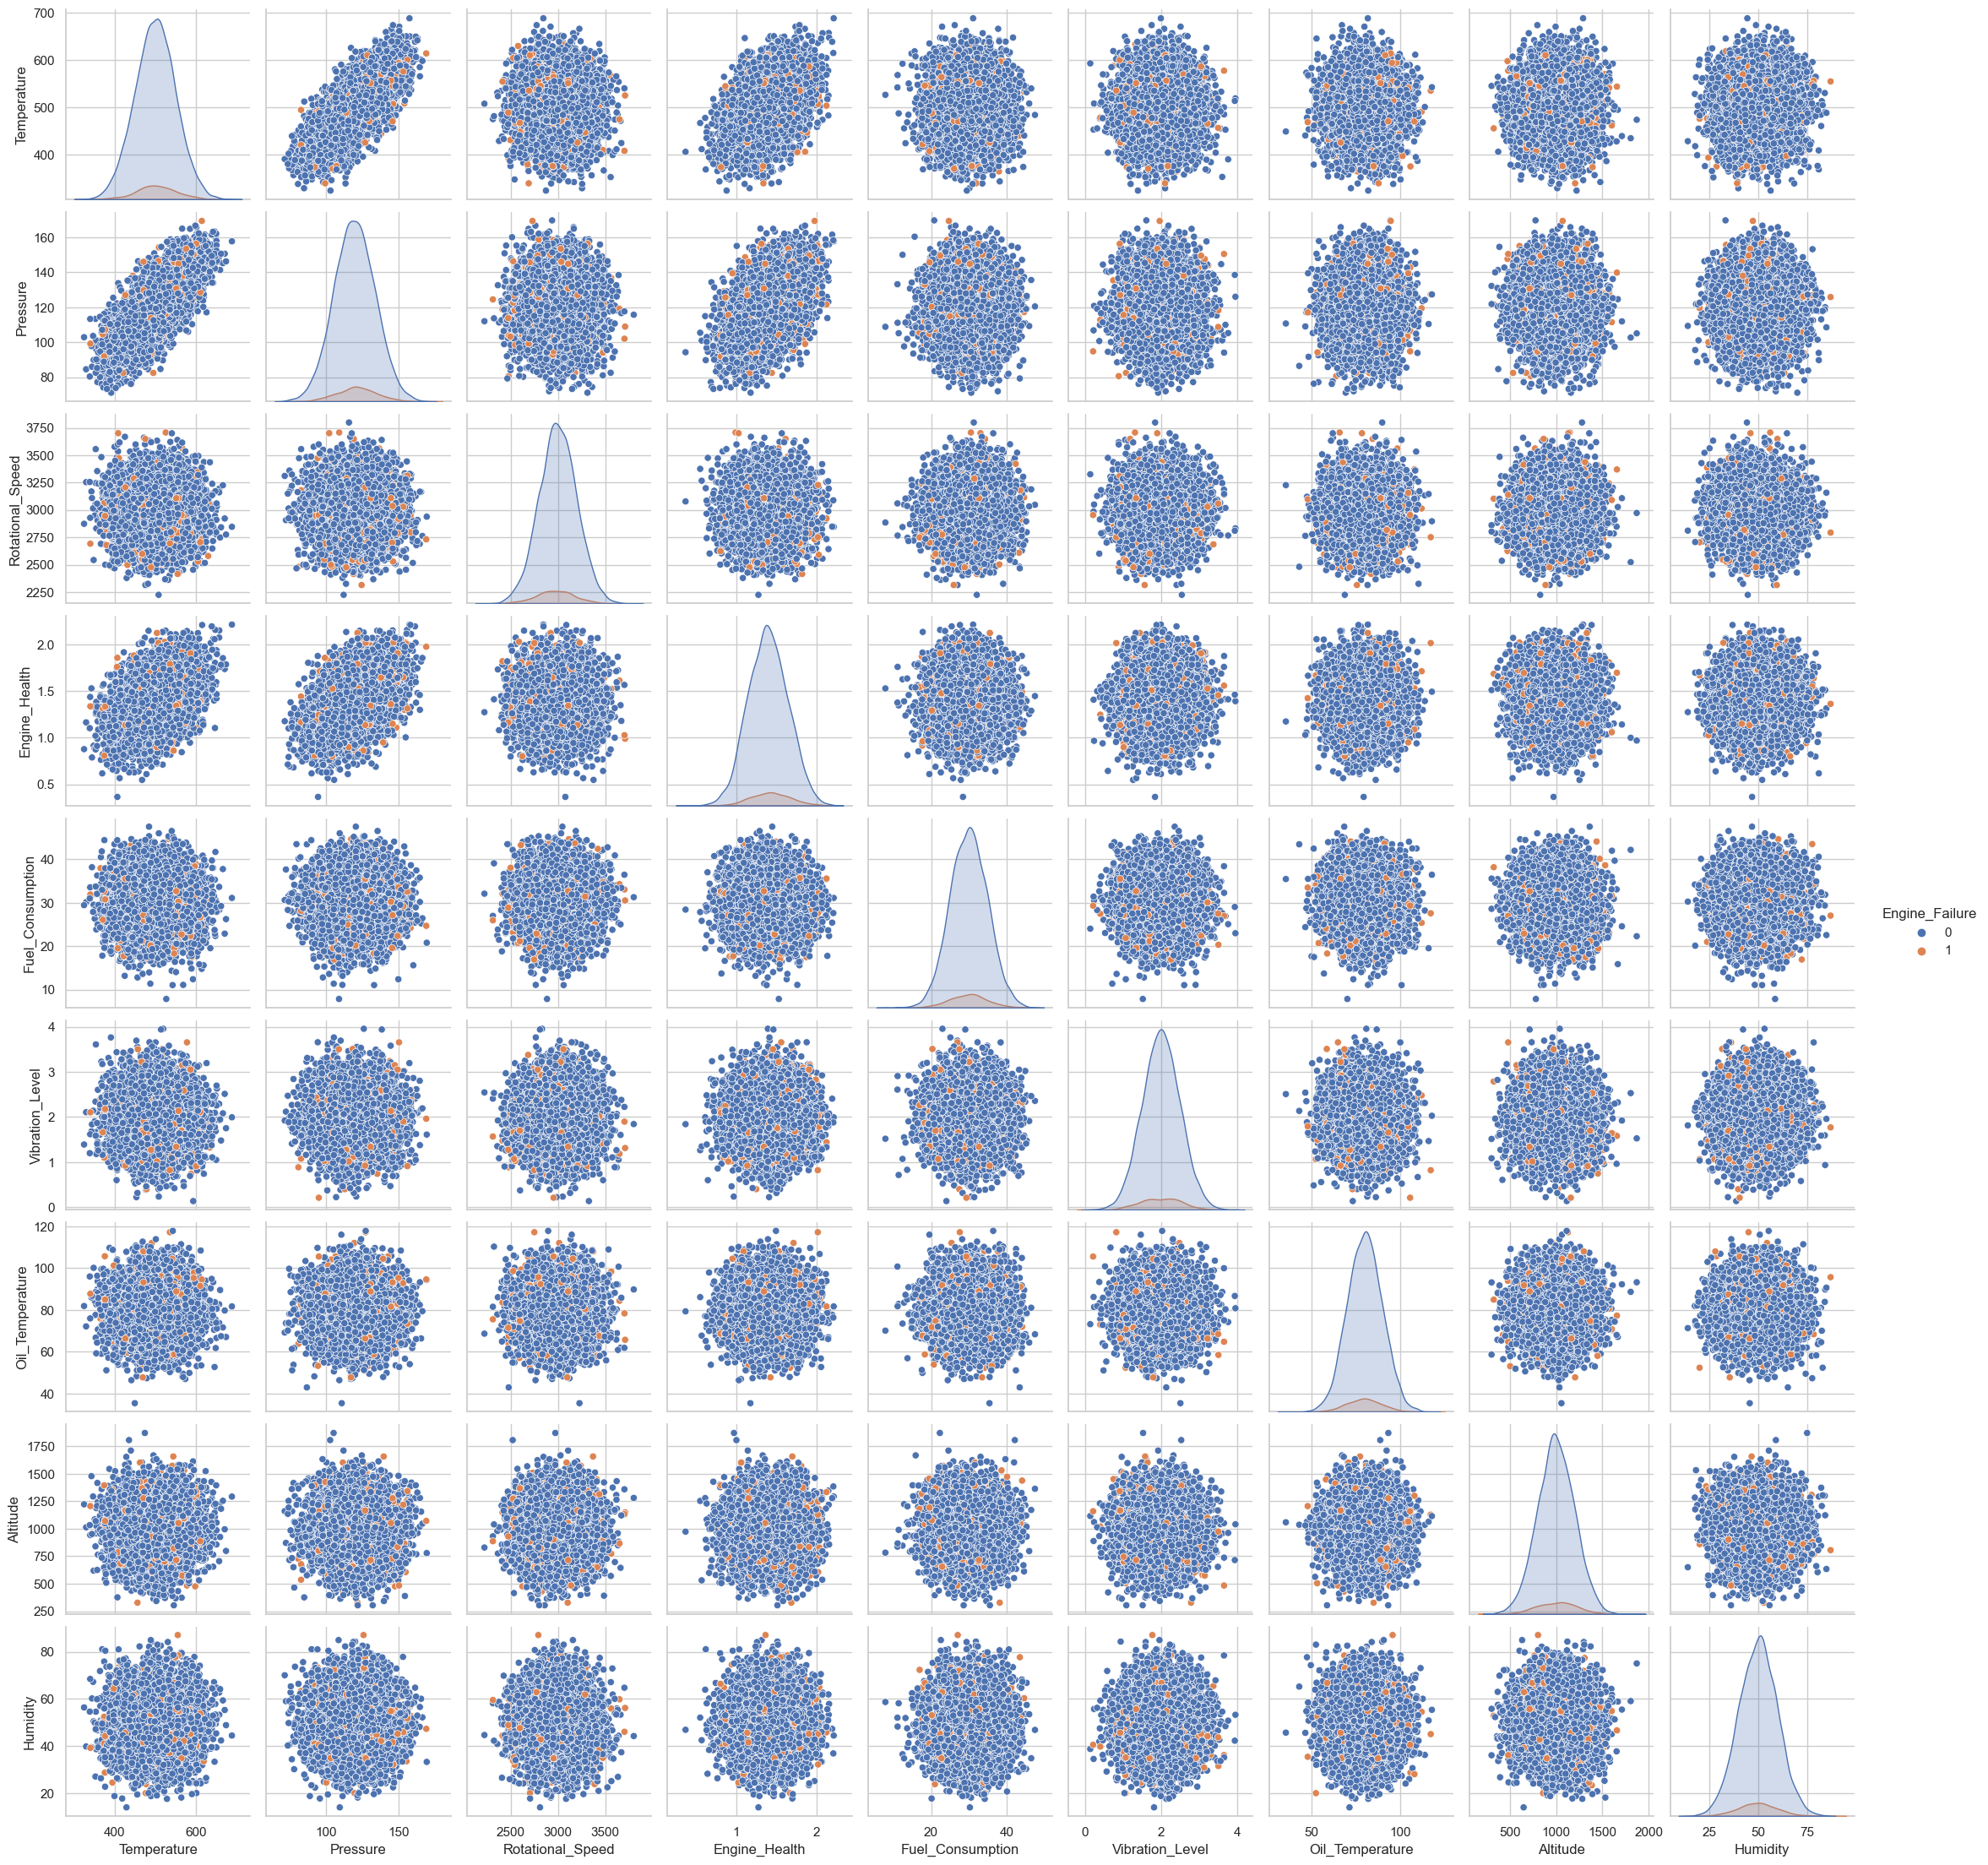

In [8]:
# Pairplot for selected features

selected_features = ['Temperature',
                     'Pressure',
                     'Rotational_Speed',
                     'Engine_Health',
                     'Fuel_Consumption',
                     'Vibration_Level',
                     'Oil_Temperature',
                     'Altitude',
                     'Humidity']

plt.figure(figsize=(12,6))
sns.pairplot(supervised_learning_df, hue='Engine_Failure', vars=selected_features)
plt.show()

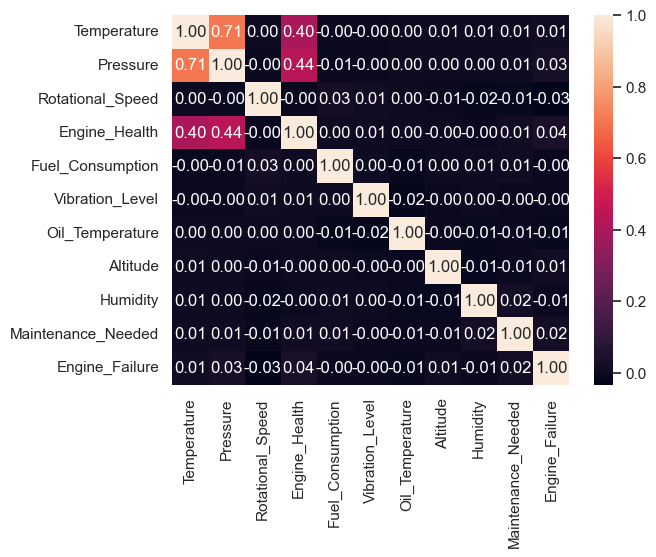

In [9]:
# Correlation matrix for selected features

correlation_matrix = supervised_learning_df[selected_features + ['Maintenance_Needed', 'Engine_Failure']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

Handling Missing Data:

In [10]:
# Checking for missing values

missing_values = supervised_learning_df.isnull().sum()
missing_values

Unnamed: 0               0
Engine_ID                0
Timestamp                0
Temperature            547
Pressure               527
Rotational_Speed       525
Engine_Health         1053
Fuel_Consumption         0
Vibration_Level          0
Oil_Temperature          0
Altitude                 0
Humidity                 0
Maintenance_Needed       0
Engine_Failure           0
dtype: int64

In [11]:
missing_column = missing_values[missing_values >0].index
missing_column

Index(['Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health'], dtype='object')

In [12]:
# Imputing missing values (mean imputation for simplicity)

supervised_learning_df.fillna(supervised_learning_df[missing_column].mean(), inplace=True)

In [13]:
# Verify that missing values have been handled

print(supervised_learning_df.isnull().sum())

Unnamed: 0            0
Engine_ID             0
Timestamp             0
Temperature           0
Pressure              0
Rotational_Speed      0
Engine_Health         0
Fuel_Consumption      0
Vibration_Level       0
Oil_Temperature       0
Altitude              0
Humidity              0
Maintenance_Needed    0
Engine_Failure        0
dtype: int64


Handling Outliers:

In [14]:
# Get all columns from the DataFrame

all_features = supervised_learning_df.columns

# Exclude the target variable to get selected features

selected_features = [i for i in all_features if i not in ['Unnamed: 0','Engine_ID','Timestamp','Maintenance_Needed','Engine_Failure']]

# Print selected features

print(selected_features)

['Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health', 'Fuel_Consumption', 'Vibration_Level', 'Oil_Temperature', 'Altitude', 'Humidity']


In [15]:
# Function to handle outliers using IQR

for feature in selected_features:
    # Calaculate the IQR for the feature
    Q1 = supervised_learning_df[feature].quantile(0.25)
    Q3 = supervised_learning_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers = (supervised_learning_df[feature] < lower_bound) | (supervised_learning_df[feature] > upper_bound)
    supervised_learning_df = supervised_learning_df[~outliers]
    
supervised_learning_df_main = supervised_learning_df

# Verify that outliers have been removed
print("Number of Rows After Removing Outliers:", len(supervised_learning_df))


Number of Rows After Removing Outliers: 9707


"""
### Data Exploration Insights ###

1. **Target Variable Distribution:**
   - The 'Engine_Failure' target variable is imbalanced, with a majority of the engine instances not failing.

2. **Pairplot of Selected Features:**
   - Pairplots of selected features indicate limited separability between instances of failed engines and those that did not.
   - Temperature and pressure show some trends, but other features exhibit considerable overlap.

3. **Correlation Analysis:**
   - 'Temperature' and 'Pressure' have a moderate positive correlation (0.71), suggesting a relationship between these parameters.
   - Other features show weak correlations (less than 0.05) with 'Engine_Failure,' indicating potential nonlinear relationships.

4. **Considerations for Modeling:**
   - Weak linear correlations do not rule out meaningful relationships, especially if they are nonlinear or interact with other features.
   - Explore feature importance using algorithms like logistic regression, decision trees or ensemble methods to identify key predictors.


 **Feature Engineering Opportunities:**
   - Experiment with feature engineering techniques to create new features capturing more complex relationships or interactions.


In [16]:
# Create interaction features

supervised_learning_df['Pressure_Temperature'] = supervised_learning_df['Pressure'] * supervised_learning_df['Temperature']
supervised_learning_df['Vibration_Rotational_Speed'] = supervised_learning_df['Vibration_Level'] * supervised_learning_df['Rotational_Speed']
supervised_learning_df['Oil_Temp_Fuel_Consumption'] = supervised_learning_df['Oil_Temperature'] * supervised_learning_df['Fuel_Consumption']

# Include the new features
selected_features += ['Pressure_Temperature','Vibration_Rotational_Speed', 'Oil_Temp_Fuel_Consumption'] 

In [17]:
# Create ratio features

supervised_learning_df['Fuel_to_Rotational_Ratio'] = supervised_learning_df['Fuel_Consumption'] / supervised_learning_df['Rotational_Speed']
supervised_learning_df['Altitude_to_Humidity_Ratio'] = supervised_learning_df['Altitude'] / supervised_learning_df['Humidity']

# Include the new features
selected_features += ['Fuel_to_Rotational_Ratio', 'Altitude_to_Humidity_Ratio'] 

In [18]:
# Create difference features

supervised_learning_df['Rel_Fuel_Altitude_Difference'] = supervised_learning_df['Fuel_Consumption'] - supervised_learning_df['Altitude']

# Include these new features in selected_features
selected_features += ['Rel_Fuel_Altitude_Difference'] 

**Modeling Approach:**
   - Consider exploring various classification algorithms (decision trees, random forests, logistic regression, SVM) to identify the model that best captures patterns in the data.



In [19]:
supervised_learning_df.columns

Index(['Unnamed: 0', 'Engine_ID', 'Timestamp', 'Temperature', 'Pressure',
       'Rotational_Speed', 'Engine_Health', 'Fuel_Consumption',
       'Vibration_Level', 'Oil_Temperature', 'Altitude', 'Humidity',
       'Maintenance_Needed', 'Engine_Failure', 'Pressure_Temperature',
       'Vibration_Rotational_Speed', 'Oil_Temp_Fuel_Consumption',
       'Fuel_to_Rotational_Ratio', 'Altitude_to_Humidity_Ratio',
       'Rel_Fuel_Altitude_Difference'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix

In [21]:
# Split the data into features (X) and target variable (y)
X = supervised_learning_df[selected_features]
y = supervised_learning_df['Engine_Failure']

In [22]:
# Split the data into training and testing sets
# train_test_split(X, y, test_size=0.2, random_state=42)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize the features
scaler = StandardScaler()

Xtrain_Scaled = scaler.fit_transform(Xtrain)
Xtest_Scaled = scaler.transform(Xtest)

In [24]:
ytrain

4469     0
3328     0
8224     0
10101    0
441      0
        ..
6233     0
5644     0
5860     0
948      1
7869     1
Name: Engine_Failure, Length: 7765, dtype: int64

In [25]:
# Initialize and train the models
models = {"Decision Trees": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(random_state=42),
          "Logisitic Regression": LogisticRegression(random_state=42),
          "SVM": SVC(random_state=42)
         }

In [26]:
models.items()

dict_items([('Decision Trees', DecisionTreeClassifier(random_state=42)), ('Random Forest', RandomForestClassifier(random_state=42)), ('Logisitic Regression', LogisticRegression(random_state=42)), ('SVM', SVC(random_state=42))])

In [27]:
print(len(ytrain), len(ytest))

7765 1942


Classification report for Decision Trees: 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1808
           1       0.11      0.15      0.13       134

    accuracy                           0.86      1942
   macro avg       0.52      0.53      0.52      1942
weighted avg       0.88      0.86      0.87      1942


Classification report for Random Forest: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1808
           1       0.00      0.00      0.00       134

    accuracy                           0.93      1942
   macro avg       0.47      0.50      0.48      1942
weighted avg       0.87      0.93      0.90      1942


Classification report for Logisitic Regression: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1808
           1       0.00      0.00      0.00       134

    accuracy                           0.93   

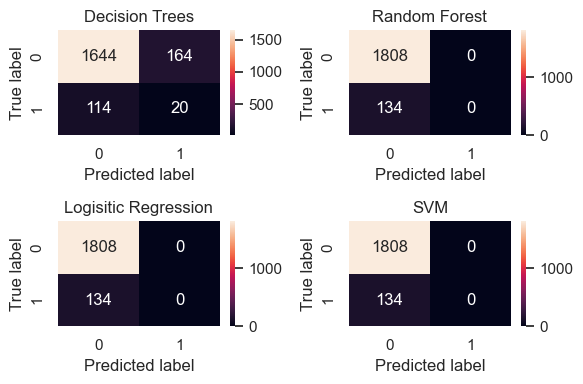

In [28]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(6,4))

for i, (model_name, model) in enumerate(models.items(), 1):

    # Train the model
    model.fit(Xtrain, ytrain)

    # Make predictions on the test set
    y_pred = model.predict(Xtest)

    # Evaluate the model
    accuracy = accuracy_score(ytest, y_pred)
    report = classification_report(ytest, y_pred)
    matrix = confusion_matrix(ytest, y_pred)
    
    print(f"Classification report for {model_name}: \n{report}\n")

    plt.subplot(2,2,i)
    sns.heatmap(matrix, annot=True, fmt="")
    plt.title(f'{model_name}')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
plt.tight_layout()
plt.show()


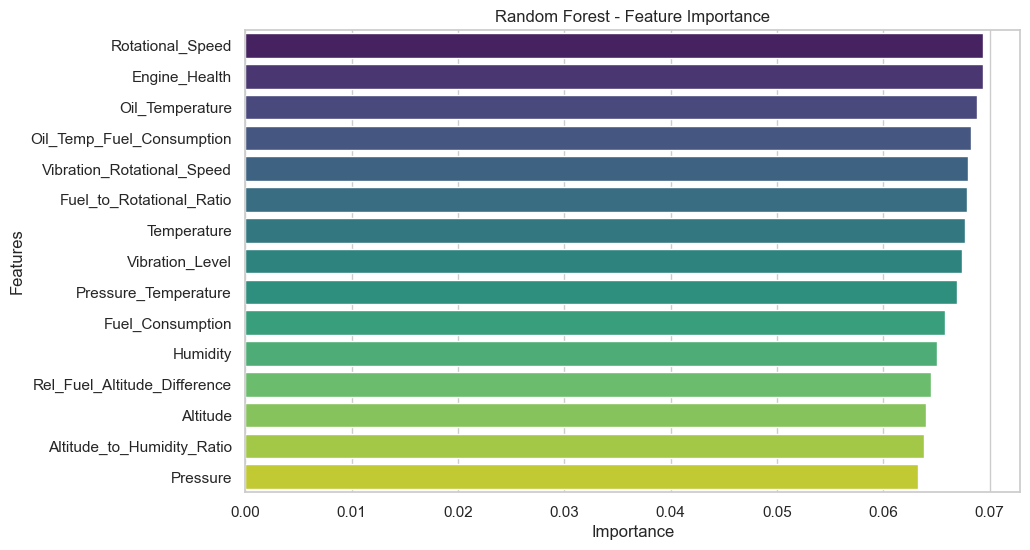

In [29]:
 import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
models['Random Forest'].fit(Xtrain_Scaled, ytrain)

# Get feature importances
feature_importances = models['Random Forest'].feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Features': selected_features, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_importance_df, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [33]:
selected_features

['Temperature',
 'Pressure',
 'Rotational_Speed',
 'Engine_Health',
 'Fuel_Consumption',
 'Vibration_Level',
 'Oil_Temperature',
 'Altitude',
 'Humidity',
 'Pressure_Temperature',
 'Vibration_Rotational_Speed',
 'Oil_Temp_Fuel_Consumption',
 'Fuel_to_Rotational_Ratio',
 'Altitude_to_Humidity_Ratio',
 'Rel_Fuel_Altitude_Difference']

### Pick some well performing features to train with and notice any changes

In [30]:
# Split the data into features (X) and target variable (y)
X_ = supervised_learning_df[['Oil_Temperature', 'Rotational_Speed', 'Temperature', 'Fuel_to_Rotational_Ratio', 'Pressure_Temperature', 'Vibration_Level']]
y_ = supervised_learning_df['Engine_Failure']

# Split the data into training and testing sets
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=6)

# Standardize the features
scaler = StandardScaler()
X_train_scaled_ = scaler.fit_transform(X_train_)
X_test_scaled_ = scaler.transform(X_test_)

Accuracy for Decision Trees: 0.8589
Classification Report for Decision Trees:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1819
           1       0.03      0.04      0.04       123

    accuracy                           0.86      1942
   macro avg       0.48      0.48      0.48      1942
weighted avg       0.88      0.86      0.87      1942



Accuracy for Random Forest: 0.9367
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1819
           1       0.00      0.00      0.00       123

    accuracy                           0.94      1942
   macro avg       0.47      0.50      0.48      1942
weighted avg       0.88      0.94      0.91      1942



Accuracy for Logisitic Regression: 0.9367
Classification Report for Logisitic Regression:
               precision    recall  f1-score   support

           0       0.94      1.00      0

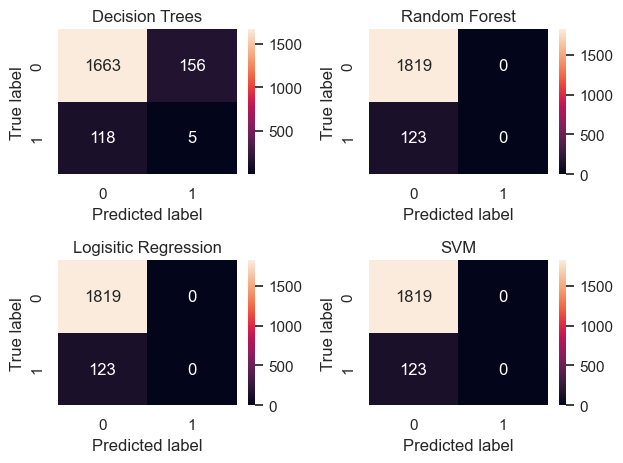

In [31]:
import warnings

# Ignore UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.metrics._classification")

for i, (model_name, model) in enumerate(models.items(), 1):
    # Train the model
    model.fit(X_train_scaled_, y_train_)

    # Make predictions on the test set
    y_pred_ = model.predict(X_test_scaled_)

    # Evaluate the model
    accuracy = accuracy_score(y_test_, y_pred_)
    report = classification_report(y_test_, y_pred_)
    matrix = confusion_matrix(y_test_, y_pred_)

    # Display results
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"Classification Report for {model_name}:\n", report)
    print("\n")
    
    plt.subplot(2,2,i)
    plt.title(f'{model_name}')
    sns.heatmap(matrix, annot=True, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

In [ ]:
supervised_learning_df.columns

**Train on main features (without feature engineering)**

In [32]:
# Split the data into features (X) and target variable (y)
X = supervised_learning_df_main[['Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health', 'Fuel_Consumption', 'Vibration_Level', 'Oil_Temperature', 'Altitude', 'Humidity']]
y = supervised_learning_df_main['Engine_Failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classification Report for Decision Trees:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1808
           1       0.08      0.10      0.09       134

    accuracy                           0.87      1942
   macro avg       0.51      0.51      0.51      1942
weighted avg       0.87      0.87      0.87      1942



Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1808
           1       0.00      0.00      0.00       134

    accuracy                           0.93      1942
   macro avg       0.47      0.50      0.48      1942
weighted avg       0.87      0.93      0.90      1942



Classification Report for Logisitic Regression:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1808
           1       0.00      0.00      0.00       134

    accuracy                           0.93 

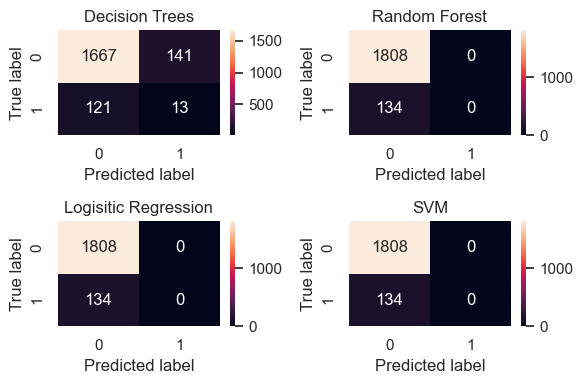

In [33]:
cm = []
model_ = []
plt.figure(figsize=(6, 4))
for i, (model_name, model) in enumerate(models.items(), 1):
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    # accuracy = accuracy_score(y_test, y_pred)

    report = classification_report(y_test, y_pred)    
    matrix = confusion_matrix(y_test, y_pred)

    # Display results
    # print(f"Accuracy for {model_name}: {accuracy:.4f}")
    
    print(f"Classification Report for {model_name}:\n", report)
    print("\n")
    
    plt.subplot(2,2,i)
    plt.title(f'{model_name}')
    sns.heatmap(matrix, annot=True, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

**Hyperparameter Optimization**

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 80, 120],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = models['Random Forest']

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

# Display results
print("### Best Random Forest Model ###")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 80}
### Best Random Forest Model ###
Accuracy: 0.9310
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1808
           1       0.00      0.00      0.00       134

    accuracy                           0.93      1942
   macro avg       0.47      0.50      0.48      1942
weighted avg       0.87      0.93      0.90      1942

Confusion Matrix:
 [[1808    0]
 [ 134    0]]


### Model Evaluation and Interpretation

Based on the provided classification reports, it's evident that the Random Forest, Logistic Regression, and SVM models perform similarly, with an accuracy of 0.93 for predicting the majority class (class 0) and very low performance for predicting the minority class (class 1), as indicated by precision, recall, and F1-score of 0 for class 1.

However, among these models, Random Forest stands out slightly because it achieves a higher precision, recall, and F1-score for class 0 compared to Logistic Regression and SVM. Although the precision, recall, and F1-score for class 1 are still 0, Random Forest's overall performance for class 0 is marginally better.

Therefore, based on the provided metrics, Random Forest can be considered marginally better than Logistic Regression and SVM for this particular classification task.

The Decision Trees model has a decent accuracy of 86%, which means it correctly predicts the target variable for 86% of the instances. However, its precision and recall for class 1 (the minority class) are relatively low at around 11% and 15% respectively. This suggests that while the model performs well in identifying the majority class (class 0), it struggles to accurately identify instances of the minority class.

In summary, while the Decision Trees model performs reasonably well overall, its lower precision and recall for the minority class indicate room for improvement, especially if accurately predicting instances of class 1 is important.

#### Decision Trees

##### Precision: The proportion of true positive predictions among all positive predictions.
- For class 0, precision is 0.94. This means that out of all predictions labeled as class 0, 94% were correct.
- For class 1, precision is 0.11, indicating that only 11% of predictions labeled as class 1 were correct.

##### Recall: The proportion of true positive predictions among all actual positives.
- For class 0, recall is 0.91, suggesting that 91% of actual class 0 instances were correctly identified.
- For class 1, recall is 0.15, showing that 15% of actual class 1 instances were correctly identified.

##### F1-Score: The harmonic mean of precision and recall.
- For class 0, the f1-score is 0.92, indicating a good balance between precision and recall.
- For class 1, the f1-score is 0.13, suggesting a low balance of precision and recall.

##### Accuracy: The proportion of correctly predicted instances among all predictions.
- The overall accuracy is 0.86, showing that 86% of all instances were correctly predicted.
- Macro Avg and Weighted Avg:
Macro average computes the average of each metric over all classes, while the weighted average accounts for class imbalance. These metrics give a broader view of model performance.



#### Random Forest

###### Precision: 
- For class 0, precision is 0.93, indicating a high proportion of correct predictions for this class.
- For class 1, precision is 0.00, implying that none of the predictions labeled as class 1 were correct.

###### Recall:
- For class 0, recall is 1.00, meaning that all actual class 0 instances were correctly identified.
- For class 1, recall is 0.00, indicating that none of the actual class 1 instances were correctly identified.

###### F1-Score:
- For class 0, the f1-score is 0.96, demonstrating a strong balance between precision and recall.
- For class 1, the f1-score is 0.00, due to both low precision and recall.

###### Accuracy:
- The overall accuracy is 0.93, indicating a high proportion of correct predictions.




#### Logistic Regression

##### Precision:
- For class 0, precision is 0.93, indicating a high rate of correct predictions for this class.
- For class 1, precision is 0.00, suggesting no correct predictions labeled as class 1.

##### Recall:
- For class 0, recall is 1.00, indicating perfect recall for this class.
- For class 1, recall is 0.00, showing no correctly identified instances for this class.

##### F1-Score:
- For class 0, the f1-score is 0.96, demonstrating a strong balance between precision and recall.
- For class 1, the f1-score is 0.00, due to low precision and recall.

##### Accuracy:
- The overall accuracy is 0.93, indicating a high rate of correct predictions.

#### Support Vector Machines (SVM) 

##### Precision:
- For class 0, precision is 0.93, indicating a high proportion of correct predictions.
- For class 1, precision is 0.00, suggesting no correct predictions labeled as class 1.

##### Recall:
- For class 0, recall is 1.00, indicating all actual instances of class 0 were identified.
- For class 1, recall is 0.00, showing none of the actual class 1 instances were identified.

##### F1-Score:
- For class 0, the f1-score is 0.96, indicating a good balance between precision and recall.
- For class 1, the f1-score is 0.00, due to low precision and recall.

##### Accuracy:
- The overall accuracy is 0.93, indicating a high rate of correct predictions.



- Summary

Decision Trees have a higher recall and f1-score for class 1 compared to the other models, but their overall accuracy is lower (0.86). They have a better weighted average, indicating a more balanced performance across classes.
Random Forest, Logistic Regression, and SVM have high accuracy (0.93), but they struggle with class 1, showing zero precision, recall, and f1-score for this class.
These reports suggest that while Decision Trees have a more balanced performance, Random Forest, Logistic Regression, and SVM tend to perform well for class 0 but poorly for class 1. The choice of the best model depends on your specific use case and requirements for handling imbalanced data or specific performance metrics. For the dataset which is imbalanced, accuracy is less important in this case, actually want to see how sensitive the model will signify. That is where recall comes in and Decison Trees has a higher recall of 94% compare to the rest of the model.

## Feature Importance: Analyze which features contribute most to predictions. 


Rotational_Speed, Engine_Health, Oil_Temperature, 'Temperature and Vibration_Rotational_Speed are the most important feature(strong indicator) in the models when considering its prediction. So in conclusion, the features stated earlier are actually the most important indicators to notify whether or not the aircraft engine will fail.

Based on the results from our predictive modeling, the most critical features that serve as strong indicators for predicting aircraft engine failure are Rotational Speed, Engine Health, Oil Temperature, and Vibration Rotational Speed. These features consistently demonstrated a significant impact on our models' prediction accuracy and provide valuable insights into the condition of the engine.

Given this analysis, we can conclude that monitoring these key indicators will be crucial in identifying early signs of potential engine failure. As a result, implementing systems or processes that track these variables can enhance predictive maintenance strategies and contribute to improving overall aircraft safety and reliability.








## Insights and Recommendations:Derive insights for predictive maintenance strategies.
Feature selection based on feature importance usually involves removing less significant features. While this can be effective in reducing noise, it may also lead to loss of information, especially if important interactions or non-linear relationships are removed. So from my observation and recommendation the model performed better when using feature engineering bcause it capture  hidden relationship, increase predictive power and reduce overfitting which we got the result for our predictive model. Even after the selecting the feature importance, it performed less and same goes to Hyperparameter Optimization. So i can say say there is a polynomial relationship within all those features and they are also indicators concerning the engine failure

Feature selection based on feature importance typically entails eliminating features that are deemed less significant to simplify the model and potentially reduce noise. While this approach can be beneficial, there is a risk of discarding valuable information, particularly when complex interactions or non-linear relationships are involved. Our findings suggest that feature engineering can be more effective, as it retains hidden relationships and often enhances the model's predictive power.

Through feature engineering, we construct new features that better capture the underlying patterns within the data, thus increasing the model's accuracy and potentially reducing overfitting. In our case, the model's performance improved with the inclusion of engineered features, indicating that important relationships were preserved. In contrast, models that relied solely on feature importance-based selection or hyperparameter optimization exhibited diminished performance, suggesting a loss of crucial information.

This observation leads us to believe that the relationships between features in our dataset may exhibit polynomial characteristics. This non-linear relationship supports the view that a more comprehensive approach to feature selection—one that incorporates feature engineering—is essential for identifying significant indicators, particularly in the context of predicting engine failure. Thus, to optimize model performance, it is recommended to employ a feature engineering strategy, allowing the model to capture complex patterns and enhance its predictive capabilities.

Feature engineering has the potential to significantly improve performance when done thoughtfully, especially when it introduces meaningful and relevant features. It's a creative process that leverages domain knowledge to create features that capture underlying patterns, potentially yielding better results than just focusing on feature importance and hyperparameter optimization.